# 30회 스터디 합격자_부천
- 기계학습: 44.4 /60
- 통계분석: 32.6 /40     
총 77/100

### packages

In [1]:
!pip install scikit-learn
!pip install imblearn

In [3]:
from IPython.display import display ,HTML
display(HTML("<style>.container {width :95% !important;}</style>"))

# 한글 그래프
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns',200)

#sample etc.
import numpy as np

#pca
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#t-test
from scipy.stats import ttest_ind


#modeling
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


import warnings 
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE
import xgboost as xgb
import scipy.stats as stats
import math
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## by datamanim

In [4]:
## by 부천
from IPython.display import display ,HTML
display(HTML("<style>.container {width :95% !important;}</style>"))

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats as stats

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 통계모델 추정
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# 참조용
#import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
#import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
    plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm 
    fm._rebuild() 
    fm.get_fontconfig_fonts()

    font_location = '/usr/share/fonts/truetype/malgun.ttf'
    font_name = fm.FontProperties(fname=font_location).get_name()

    print(font_name)

    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 30회 ADP 복원 

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv

In [92]:
#encoding = ['utf-8','cp949','utf-8-sig','euc-kr','latin']
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head(3)

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.8,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.6,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.3,5.87,1.29,1.75,3.37,10.1,61.1,4.85


## 1-1  EDA를 시행하라 

1. 결측치의 처리


,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
결측치,0,0,0,0,0,1,0,0,0,0,0,0



전체 데이터 건수가 4303 건 이고, 결측치가 Chol 변수에서 1건이 관측되었다.
전체 건수 대비 0.0232 % 미만의 비중을 차지하기때문에, 결측치를 제거해도 그 영향이 미미하다고 판단하여 결측치를 삭제하였다.



,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
결측치,0,0,0,0,0,0,0,0,0,0,0,0


결측치 삭제 결과. 전체 건수는 4302 건이다.

종속변수는 DBP (이완기혈압) 으로 연속형 변수이고,
그외 독립변수들은 범주형 변수인 Gender (성별) 를 제외하고, 나머지 변수들은 연속형 변수이다. 

각 변수들의 분포는 아래와 같다.



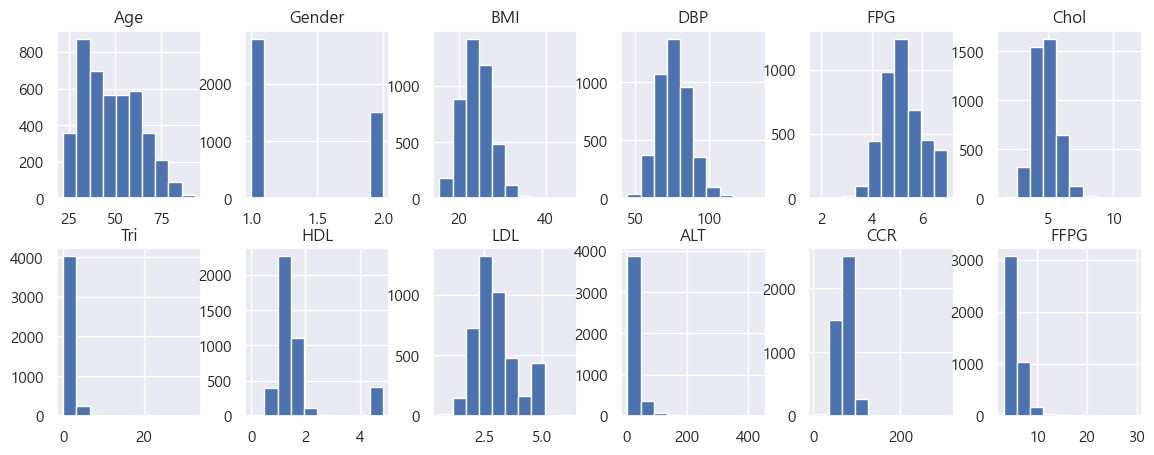



2. 이상치의 처리

Tri 변수의 경우 극단적으로 큰 값이 1건 존재 하여, 이상치 제거 처리를 하였다.



,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
2298,31,1,28.9,85,5.0,11.65,32.64,1.77,3.18,53.2,59.0,5.4


이상치 제거 결과. 전체 건수는 4301 건이다.


3. 상관관계


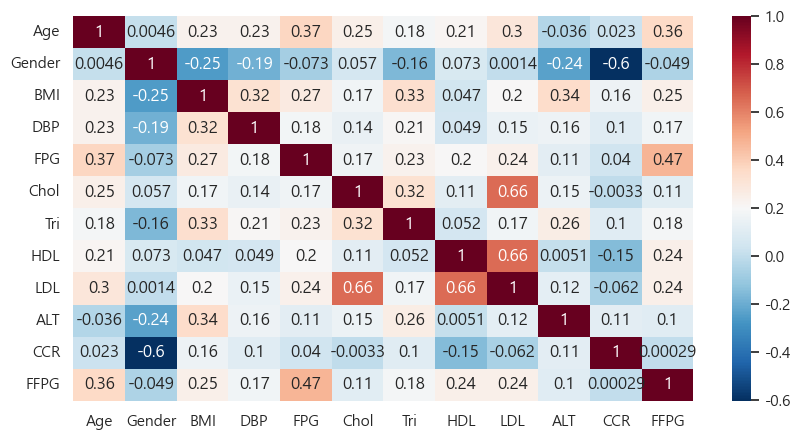

독립변수간 강한상관관계를 보이는 변수는 없는것으로 확인하였다.



In [93]:
df1 = df.copy()
df1

print('1. 결측치의 처리')
df1_isna_before = df1.isna().sum().to_frame().T
df1_isna_before.index = ['결측치']
display(df1_isna_before)

print('''
전체 데이터 건수가 {} 건 이고, 결측치가 Chol 변수에서 1건이 관측되었다.
전체 건수 대비 {} % 미만의 비중을 차지하기때문에, 결측치를 제거해도 그 영향이 미미하다고 판단하여 결측치를 삭제하였다.
''' .format(df1.shape[0], round(1/df1.shape[0] * 100, 4)))

df1.dropna(axis=0, inplace=True)

df1_isna_after = df1.isna().sum().to_frame().T
df1_isna_after.index = ['결측치']
display(df1_isna_after)

print('''결측치 삭제 결과. 전체 건수는 {} 건이다.

종속변수는 DBP (이완기혈압) 으로 연속형 변수이고,
그외 독립변수들은 범주형 변수인 Gender (성별) 를 제외하고, 나머지 변수들은 연속형 변수이다. 

각 변수들의 분포는 아래와 같다.
''' .format(df1.shape[0]))

df1.hist(layout=(2,6), figsize=(14, 5))
plt.show()


print('\n\n2. 이상치의 처리')
#display(df1.describe())

q1 = df1['Tri'].quantile(0.25)
q3 = df1['Tri'].quantile(0.75)

iqr = (q3 - q1) * 1.5

df1[(df1['Tri'] < (q1 - iqr)) | (df1['Tri'] > (q3 + iqr))].describe()

print('''
Tri 변수의 경우 극단적으로 큰 값이 1건 존재 하여, 이상치 제거 처리를 하였다.
''')

display(df1[(df1['Tri'] > (15))])

df1.drop(df1[(df1['Tri'] > (15))].index, axis=0, inplace=True)


print('이상치 제거 결과. 전체 건수는 {} 건이다.' .format(df1.shape[0]))


print('\n\n3. 상관관계')
df1_corr = df1.corr()

plt.figure(figsize=(10, 5))  # 가로 10, 세로 6의 크기로 조절
sns.heatmap(data=df1_corr, cmap='RdBu_r', annot=True, cbar=True)
plt.show()

print('''독립변수간 강한상관관계를 보이는 변수는 없는것으로 확인하였다.
''')

## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라


종속변수가 연속형 변수로 회귀분석 모델링이 필요한 데이터이다.

회귀분석 모델링 시에 변수간 스케일의 차이가 모델링 결과에 크게 영향을 미치기 때문에, 스케일링(정규화/표준화)를 수행해야한다.
회귀 모델에 비교적 적합한 MinMaxScaler 를 이용하여 정규화를 수행하였다.



,Age,Gender,BMI,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,0.056338,0.0,0.149007,0.771593,0.332515,0.057602,0.185156,0.329843,0.017373,0.195073,0.083019
1,0.253521,0.0,0.069536,0.541267,0.251534,0.068319,0.308594,0.261780,0.010887,0.216586,0.033962
2,0.253521,1.0,0.135762,0.675624,0.517791,0.086403,0.360027,0.493892,0.012972,0.186137,0.062264


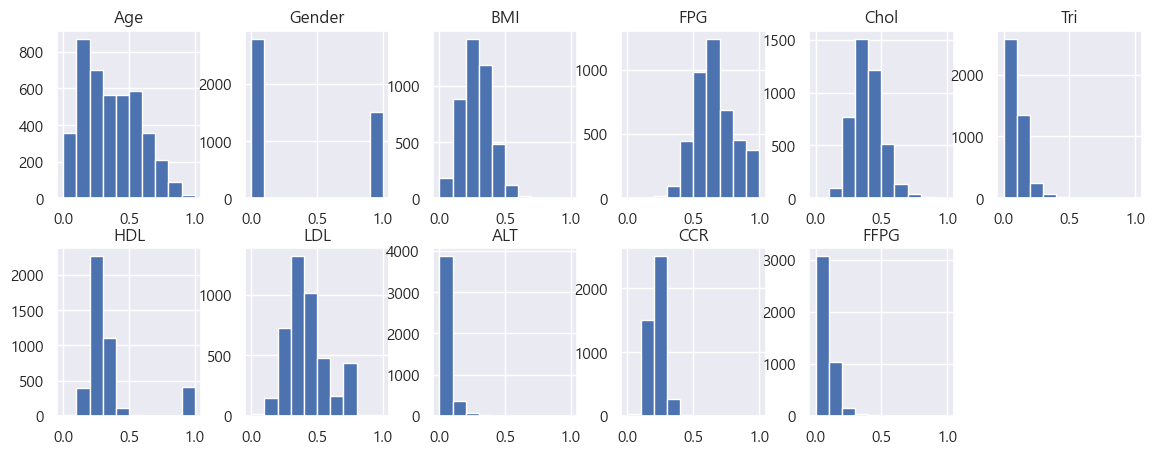


MinMaxScaler 를 이용하여 최소값 0, 최대값 1 로 정규화하는 처리를 정상적으로 수행하였음을 확인하였다.



In [94]:
## 회귀모델 모델링 시 변수간 스케일의 차이가 결과에 영향을 크게 미치기 때문에 스케일링(정규화)를 수행한다. 분류모델에 비교적 알맞은 MinMaxScaler 를 이용해 정규화를 수행하도록 한다.
print('''
종속변수가 연속형 변수로 회귀분석 모델링이 필요한 데이터이다.

회귀분석 모델링 시에 변수간 스케일의 차이가 모델링 결과에 크게 영향을 미치기 때문에, 스케일링(정규화/표준화)를 수행해야한다.
회귀 모델에 비교적 적합한 MinMaxScaler 를 이용하여 정규화를 수행하였다.
''')

df1.reset_index(drop=True, inplace=True)

target_col = 'DBP'

X = df1.drop(target_col, axis=1)
y = df1[target_col]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
df_scaled.columns = X.columns

display(df_scaled.head(3))

df_scaled.hist(layout=(2,6), figsize=(14, 5))
plt.show()

print('''
MinMaxScaler 를 이용하여 최소값 0, 최대값 1 로 정규화하는 처리를 정상적으로 수행하였음을 확인하였다.
''')

## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

In [95]:
df_holdout = df_scaled.copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_holdout, y, test_size=0.3, random_state=42)

whole_size = X_scaled.shape[0]
train_size = X_train.shape[0]
test_size = X_test.shape[0]

train_ratio = round(train_size/whole_size, 4)
test_ratio  = round(test_size/whole_size, 4)

print('''
train set 사이즈는 {} 건이고,
test set 사이즈는 {} 건이다.

전체건수는 {} 건이므로,

train set 비율 : {}
test set 비율 : {}

으로 어느정도 7:3 의 비율로 잘 나뉘어졌음을 확인 할 수 있다.
''' .format(train_size, test_size, whole_size, train_ratio, test_ratio))


train set 사이즈는 3010 건이고,
test set 사이즈는 1291 건이다.

전체건수는 4301 건이므로,

train set 비율 : 0.6998
test set 비율 : 0.3002

으로 어느정도 7:3 의 비율로 잘 나뉘어졌음을 확인 할 수 있다.



## 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [96]:
print('''
차원 축소의 필요성
 - 데이터를 설명할 수 있는 변수가 많아지면 많아질 수록 
   학습모델의 성능이 저하되는 '차원의 저주' 현상을 겪을 가능성이 있다.
 - 차원 축소 기법을 이용하여, 고차원 데이터셋으로 부터 유용한 정보는 유지하면서,
   차원을 줄여 데이터를 메모리측면에서 더 효율적으로 처리할 수 있고, 속도 향상도 도모 할 수 있다.


위와 같은 차원 축소의 필요성이 있으나, 차원 축소를 하지 않기로 판단하였다.

차원 축소의 단점
 - 차원축소 기법이 데이터의 변동성을 최대한 보존하면서 차원을 축소하지만,
   주성분 혹은 잠재 변수들이 항상 직관적으로 해석하기 어렵다는 단점이 있다.
 - 차원축소를 수행함으로 인하여, 데이터의 특성들이 혼합될 수 있다.

현재 분석하고 있는 데이터셋의 독립변수가 11개로, 차원축소가 필요한 고차원이라고 보기 힘들다.

차원축소로 인하여 모델의 결과를 해석할 여지를 없애기보다는,
차원을 유지하여 모델의 결과해석을 위해 변수중요도를 확인하는 등, 
결과 해석 및 인사이트 도출에 활용하기 위해 차원축소를 하지 않고 유지하도록 한다. 
''')


차원 축소의 필요성
 - 데이터를 설명할 수 있는 변수가 많아지면 많아질 수록 
   학습모델의 성능이 저하되는 '차원의 저주' 현상을 겪을 가능성이 있다.
 - 차원 축소 기법을 이용하여, 고차원 데이터셋으로 부터 유용한 정보는 유지하면서,
   차원을 줄여 데이터를 메모리측면에서 더 효율적으로 처리할 수 있고, 속도 향상도 도모 할 수 있다.


위와 같은 차원 축소의 필요성이 있으나, 차원 축소를 하지 않기로 판단하였다.

차원 축소의 단점
 - 차원축소 기법이 데이터의 변동성을 최대한 보존하면서 차원을 축소하지만,
   주성분 혹은 잠재 변수들이 항상 직관적으로 해석하기 어렵다는 단점이 있다.
 - 차원축소를 수행함으로 인하여, 데이터의 특성들이 혼합될 수 있다.

현재 분석하고 있는 데이터셋의 독립변수가 11개로, 차원축소가 필요한 고차원이라고 보기 힘들다.

차원축소로 인하여 모델의 결과를 해석할 여지를 없애기보다는,
차원을 유지하여 모델의 결과해석을 위해 변수중요도를 확인하는 등, 
결과 해석 및 인사이트 도출에 활용하기 위해 차원축소를 하지 않고 유지하도록 한다. 



## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

In [97]:
print('''
첨언 : 
시간의 쫓겨 정의만 간단히 서술하고 넘겼습니다.
''')


첨언 : 
시간의 쫓겨 정의만 간단히 서술하고 넘겼습니다.



In [98]:
print('''
회귀분석의 기본가정은 4가지가 있다.
좋은 모델을 구축하기 위해서는 이 4가지 기본가정을 만족해야한다.

- 선형성 가정 (Linearity Assumption)
  회귀 모델은 종속 변수와 독립 변수 사이에 선형 관계가 있다고 가정 한다.

- 독립성 가정 (Independence Assumption)
  관측치(데이터 포인트)는 서로 독립적이어야 한다. 

- 등분산성 가정 (Homoscedasticity Assumption)'
  오차 항(residuals)은 독립 변수의 값에 관계없이 오차의 분산이 일정해야 한다.

- 정규성 가정 (Normality Assumption)
  오차 항(residuals)은 정규 분포를 따라야 한다 
''')


회귀분석의 기본가정은 4가지가 있다.
좋은 모델을 구축하기 위해서는 이 4가지 기본가정을 만족해야한다.

- 선형성 가정 (Linearity Assumption)
  회귀 모델은 종속 변수와 독립 변수 사이에 선형 관계가 있다고 가정 한다.

- 독립성 가정 (Independence Assumption)
  관측치(데이터 포인트)는 서로 독립적이어야 한다. 

- 등분산성 가정 (Homoscedasticity Assumption)'
  오차 항(residuals)은 독립 변수의 값에 관계없이 오차의 분산이 일정해야 한다.

- 정규성 가정 (Normality Assumption)
  오차 항(residuals)은 정규 분포를 따라야 한다 




이와 같이 풀면 정답일것 같아요


1. 선형성 : 선형성 가정은 독립 변수와 종속 변수 사이에 선형 관계가 있는지를 의미한다. 
선형 회귀 모델 구축 자체가 선형 관계를 가정하므로 별도의 확인이 필요하지 않다.



Dep. Variable:,DBP,R-squared:,0.154
Model:,OLS,Adj. R-squared:,0.151
Method:,Least Squares,F-statistic:,70.79
Date:,"Sat, 30 Sep 2023",Prob (F-statistic):,1.78e-146
Time:,00:42:00,Log-Likelihood:,-16059.
No. Observations:,4301,AIC:,3.214e+04
Df Residuals:,4289,BIC:,3.222e+04
Df Model:,11,,
Covariance Type:,nonrobust,,





2. 독립성 (Independence): 관측치는 서로 독립적이어야 한다. 
이를 확인하려면 잔차(residual)의 자기 상관(autocorrelation)을 확인한다. 

Durbin-Watson 통계량: 1.9901075324381894

Durbin-Watson 통계량이 대략 2에 가깝다면 자기 상관이 없다는 것을 나타낸다. 
관측치가 서로 독립적임을 알 수 있다.
값이 2에서 크게 벗어나면 자기 상관이 있을 수 있다.




3. 등분산성 (Homoscedasticity): 
등분산성 가정은 오차 항의 분산이 독립 변수의 값과 관계없이 일정하다는 것을 의미한다. 
이를 확인하려면 잔차의 산포도를 그려서 확인한다.



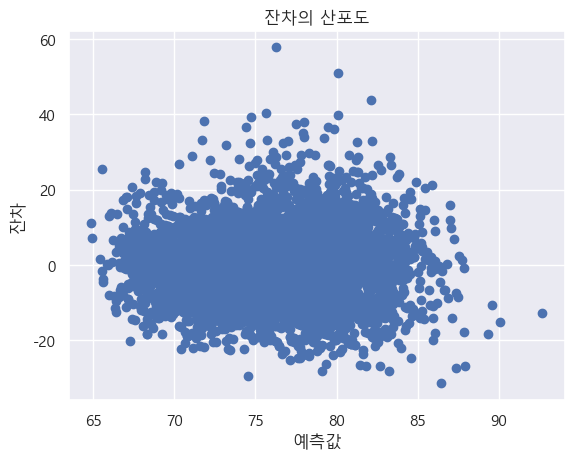


산포도 그래프에서 잔차가 예측값에 따라 어떻게 퍼져 있는지 확인하여 등분산성을 확인한다. 
특정 패턴이나 흩어짐의 불균형이 없고, 잔차가 무작위로 분포하여 등분산성 가정이 만족함을 볼수있다.




4. 정규성 (Normality): 잔차는 정규 분포를 따라야 한다. 
이를 확인하기 위해 잔차의 정규 분포 여부를 확인하는 QQ 플롯을 사용할 수 있다.



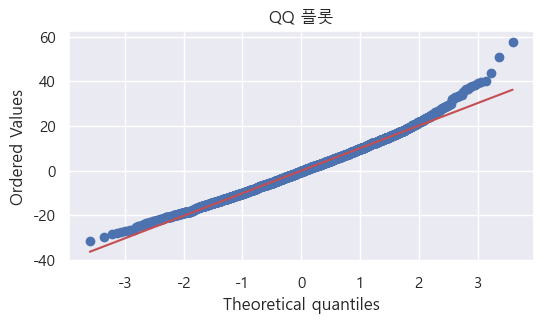


QQ 플롯은 잔차가 정규 분포를 따르는지 확인하는데 도움이 된다. 
잔차가 직선에 가깝게 분포하여 정규성 가정이 만족된것을 확인 할 수 있다.



In [99]:
print('''
이와 같이 풀면 정답일것 같아요
''')

print('''
1. 선형성 : 선형성 가정은 독립 변수와 종속 변수 사이에 선형 관계가 있는지를 의미한다. 
선형 회귀 모델 구축 자체가 선형 관계를 가정하므로 별도의 확인이 필요하지 않다.
''')

# 상수항 (intercept) 추가
X_model = sm.add_constant(df_holdout)

# 선형 회귀 모델 적합
model = sm.OLS(y, X_model).fit()
display(model.summary().tables[0])

print('''


2. 독립성 (Independence): 관측치는 서로 독립적이어야 한다. 
이를 확인하려면 잔차(residual)의 자기 상관(autocorrelation)을 확인한다. 
''')

from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson 통계량 계산
durbin_watson_statistic = durbin_watson(model.resid)

# Durbin-Watson 통계량 출력
print(f"Durbin-Watson 통계량: {durbin_watson_statistic}")

print('''
Durbin-Watson 통계량이 대략 2에 가깝다면 자기 상관이 없다는 것을 나타낸다. 
관측치가 서로 독립적임을 알 수 있다.
값이 2에서 크게 벗어나면 자기 상관이 있을 수 있다.


''')


print('''
3. 등분산성 (Homoscedasticity): 
등분산성 가정은 오차 항의 분산이 독립 변수의 값과 관계없이 일정하다는 것을 의미한다. 
이를 확인하려면 잔차의 산포도를 그려서 확인한다.
''')
# 잔차의 산포도 그래프
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차의 산포도")
plt.show()

print('''
산포도 그래프에서 잔차가 예측값에 따라 어떻게 퍼져 있는지 확인하여 등분산성을 확인한다. 
특정 패턴이나 흩어짐의 불균형이 없고, 잔차가 무작위로 분포하여 등분산성 가정이 만족함을 볼수있다.


''')


print('''
4. 정규성 (Normality): 잔차는 정규 분포를 따라야 한다. 
이를 확인하기 위해 잔차의 정규 분포 여부를 확인하는 QQ 플롯을 사용할 수 있다.
''')

# QQ 플롯 그래프
residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 3))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("QQ 플롯")
plt.show()

print('''
QQ 플롯은 잔차가 정규 분포를 따르는지 확인하는데 도움이 된다. 
잔차가 직선에 가깝게 분포하여 정규성 가정이 만족된것을 확인 할 수 있다.
''')

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

In [100]:
print('''
[SVM (Support Vector Machine)]
 > 특징
 - SVM은 분류(classification)와 회귀(regression) 모두에 사용될 수 있다.
 - SVM은 데이터의 비선형 관계를 잘 모델링할 수 있도록 커널 기법을 사용할 수 있다. 
 - 주로 선형 커널, 다항식 커널, 또는 가우시안 RBF 커널을 사용한다.
 - 최대 마진을 활용하여 결정 경계를 찾으며, 이로 인해 일반화 성능이 뛰어나다.

 > 장점 :
 - SVM은 선형 및 비선형 분류 문제에서 우수한 성능을 보이며, 
   이상치(outlier)에 대한 강한 저항력을 가진다.
 - 다양한 커널 함수를 사용하여 다양한 데이터 유형에 대응할 수 있다.
 - SVM은 최대 마진을 추구하므로 일반화 성능이 우수하다.

 > 단점
 - SVM은 데이터의 스케일에 민감하므로 데이터 전처리가 중요하다.
 - 대용량 데이터셋에서는 계산 비용이 높을 수 있으며, 학습 시간이 오래 걸릴 수 있다.
 
 
[XGBoost (eXtreme Gradient Boosting)]
 > 특징
 - XGBoost는 트리 기반의 앙상블 학습 모델로, 그라디언트 부스팅(Gradient Boosting)을 기반으로 하며,
 과적합을 줄이기 위한 정규화와 가지치기 기능을 포함하고 있다.
 - 속도와 성능 면에서 우수하며, 다양한 분류 및 회귀 문제에 적용할 수 있다.
 - 특징 중요도 (변수 중요도)를 계산하여 변수 선택과 모델 해석에 용이하다.

 > 장점
 - XGBoost는 많은 데이터 경진 대회에서 우승을 차지하며, 다양한 데이터 유형에서 뛰어난 성능을 보인다.
 - 회귀, 분류, 랭킹, 예측 문제에 대한 다양한 손실 함수를 제공한다.
 - 정규화와 가지치기 기능을 통해 과적합을 줄일 수 있다.

 > 단점
 - 적절한 하이퍼파라미터를 선택하고 튜닝하는데 시간과 노력이 필요하다.
 - 메모리 요구량이 크고, 대용량 데이터에 대한 학습 및 예측 시간이 오래 걸릴 수 있다.


[RandomForest]
 > 특징
 - RandomForest는 의사결정 트리(Decision Tree)를 기반으로 하는 앙상블 학습 모델이다.
 - 여러 개의 의사결정 트리를 생성하고 
   각 트리의 예측 결과를 결합하여 안정적이고 강력한 예측을 제공한다.
 - 과적합을 줄이기 위한 부트스트랩 샘플링과 무작위 특성 선택을 사용한다.

 > 장점
 - RandomForest는 과적합을 피하면서 좋은 예측 성능을 제공할 수 있다.
 - 특징 중요도 (변수 중요도) 를 평가하고 모델 해석에 용이하다.
 - 분류 및 회귀 문제 등 다양한 데이터에 널리 사용가능하다.

 > 단점
 - 트리의 개수가 많을수록 모델이 복잡해져 과적합 가능성이 높아질 수 있다. 
   (학습데이터셋에 과대적합) 하이퍼파라미터를 조절하여 이를 방지하려는 노력을 해야한다.
 - RandomForest는 다수의 트리를 결합하여 예측을 수행하므로 개별 트리 해석이 어렵다.
''')


[SVM (Support Vector Machine)]
 > 특징
 - SVM은 분류(classification)와 회귀(regression) 모두에 사용될 수 있다.
 - SVM은 데이터의 비선형 관계를 잘 모델링할 수 있도록 커널 기법을 사용할 수 있다. 
 - 주로 선형 커널, 다항식 커널, 또는 가우시안 RBF 커널을 사용한다.
 - 최대 마진을 활용하여 결정 경계를 찾으며, 이로 인해 일반화 성능이 뛰어나다.

 > 장점 :
 - SVM은 선형 및 비선형 분류 문제에서 우수한 성능을 보이며, 
   이상치(outlier)에 대한 강한 저항력을 가진다.
 - 다양한 커널 함수를 사용하여 다양한 데이터 유형에 대응할 수 있다.
 - SVM은 최대 마진을 추구하므로 일반화 성능이 우수하다.

 > 단점
 - SVM은 데이터의 스케일에 민감하므로 데이터 전처리가 중요하다.
 - 대용량 데이터셋에서는 계산 비용이 높을 수 있으며, 학습 시간이 오래 걸릴 수 있다.
 
 
[XGBoost (eXtreme Gradient Boosting)]
 > 특징
 - XGBoost는 트리 기반의 앙상블 학습 모델로, 그라디언트 부스팅(Gradient Boosting)을 기반으로 하며,
 과적합을 줄이기 위한 정규화와 가지치기 기능을 포함하고 있다.
 - 속도와 성능 면에서 우수하며, 다양한 분류 및 회귀 문제에 적용할 수 있다.
 - 특징 중요도 (변수 중요도)를 계산하여 변수 선택과 모델 해석에 용이하다.

 > 장점
 - XGBoost는 많은 데이터 경진 대회에서 우승을 차지하며, 다양한 데이터 유형에서 뛰어난 성능을 보인다.
 - 회귀, 분류, 랭킹, 예측 문제에 대한 다양한 손실 함수를 제공한다.
 - 정규화와 가지치기 기능을 통해 과적합을 줄일 수 있다.

 > 단점
 - 적절한 하이퍼파라미터를 선택하고 튜닝하는데 시간과 노력이 필요하다.
 - 메모리 요구량이 크고, 대용량 데이터에 대한 학습 및 예측 시간이 오래 걸릴 수 있다.


[RandomForest]
 

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [101]:
print('''
첨언 : 
저는 뒤문제부터 앞으로 오면서 풀었고, 잔여시간 10분에 이부분을 풀고있었습니다.

이 문제에서 회귀모델로 풀어야하는데 분류모델로 풀었습니다..
4번 복붙이슈.. 타이핑이 좀더 빨랐더라면...하고 느낀 부분이 이곳이엇네요ㅠ


처음에 로지스틱회귀모델, XGBClassifier, RandomforestClassifier 로 지정했으나
회귀문제를 분류모델로 풀려고 하니 오류가 나는것을... 인지하지 못하고 급한마음에 SVM (SVC) 로 바꾸어서 풀었습니다.

0, 1 로 분류된탓에 RMSE 값은 100이 넘는 값이 산출되었습니다.
아마 대부분의 감점은 이곳에서 발생했을거라고 생각합니다.

제시된 방법대로 회귀모델로 모델링하여 풀도록 하겠습니다.
''')


첨언 : 
저는 뒤문제부터 앞으로 오면서 풀었고, 잔여시간 10분에 이부분을 풀고있었습니다.

이 문제에서 회귀모델로 풀어야하는데 분류모델로 풀었습니다..
4번 복붙이슈.. 타이핑이 좀더 빨랐더라면...하고 느낀 부분이 이곳이엇네요ㅠ


처음에 로지스틱회귀모델, XGBClassifier, RandomforestClassifier 로 지정했으나
회귀문제를 분류모델로 풀려고 하니 오류가 나는것을... 인지하지 못하고 급한마음에 SVM (SVC) 로 바꾸어서 풀었습니다.

0, 1 로 분류된탓에 RMSE 값은 100이 넘는 값이 산출되었습니다.
아마 대부분의 감점은 이곳에서 발생했을거라고 생각합니다.

제시된 방법대로 회귀모델로 모델링하여 풀도록 하겠습니다.



In [102]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test
model_list = ['SVR', 'XGB', 'RF']
train_list = []
test_list = []

svr = SVR()
xgr = XGBRegressor(random_state=1234)
rfr = RandomForestRegressor(random_state=1234)

svr.fit(X_train, y_train)
xgr.fit(X_train, y_train)
rfr.fit(X_train, y_train)

svr_tp = svr.predict(X_train)
xgr_tp = xgr.predict(X_train)
rfr_tp = rfr.predict(X_train)

svr_vp = svr.predict(X_test)
xgr_vp = xgr.predict(X_test)
rfr_vp = rfr.predict(X_test)

# print('- train -----------------------------')
train_list.append(mean_squared_error(y_train, svr_tp, squared=False))
train_list.append(mean_squared_error(y_train, xgr_tp, squared=False))
train_list.append(mean_squared_error(y_train, rfr_tp, squared=False))

# print('- test -----------------------------')
test_list.append(mean_squared_error(y_test, svr_vp, squared=False))
test_list.append(mean_squared_error(y_test, xgr_vp, squared=False))
test_list.append(mean_squared_error(y_test, rfr_vp, squared=False))

df3_rslt = pd.DataFrame(data=[model_list, train_list, test_list]).T
df3_rslt.columns = ['모델', '학습셋', '검증셋']

display(df3_rslt)

print('''
RMSE 는 예측값과 실제값 간의 오차의 크기를 측정하는 평가지표로
평가지표의 값이 작을 수록 모델의 예측이 관측값과 가깝다는 것을 의미하며
작을 수록 좋은 성능을 나타내는 평가 지표이다.

3가지 모델 중 SVM 회귀모델이 가장 좋은 결과를 보인다.
''')

,모델,학습셋,검증셋
0,SVR,10.101956,10.110954
1,XGB,2.452548,11.076345
2,RF,3.885442,10.298385



RMSE 는 예측값과 실제값 간의 오차의 크기를 측정하는 평가지표로
평가지표의 값이 작을 수록 모델의 예측이 관측값과 가깝다는 것을 의미하며
작을 수록 좋은 성능을 나타내는 평가 지표이다.

3가지 모델 중 SVM 회귀모델이 가장 좋은 결과를 보인다.



## (추가) 3-3 가장 최적화된 알고리즘을 이용하여 K-Fold 교차검증을 수행하시오.

In [103]:
from sklearn.model_selection import KFold

kf_model = SVR()

X_fold = df_scaled.copy()
X_fold = X_fold.values
y_fold = y.copy()

# KFold 객체 생성
kfold = KFold(n_splits = 5, shuffle = True, random_state = 50)

# 각 폴드에 대한 성능 저장을 위한 리스트
rmse_scores = []

# K-Fold 교차검증 수행
for train_index, test_index in kfold.split(X_fold) :
    X_train_set, X_test_set = X_fold[train_index], X_fold[test_index]
    y_train_set, y_test_set = y_fold[train_index], y_fold[test_index]

    # 모델 훈련
    kf_model.fit(X_train_set, y_train_set)

    # 검증 데이터로 예측
    y_pred = kf_model.predict(X_test_set)

    # 평균 제곱 오차(Mean Squared Error) 계산
    rmse = mean_squared_error(y_test_set, y_pred, squared=False)
    rmse_scores.append(rmse)

# 각 폴드의 성능 및 평균 성능 출력
for i, rmse in enumerate(rmse_scores):
    print(f"Fold {i+1} RMSE: {rmse}")

mean_rmse = np.mean(rmse_scores)
print(f"Mean RMSE : {mean_rmse}")
    
print('''
K-Fold 기법을 이용하여 5겹의 세트로 분할하고 
4개의 학습셋 1개의 검증셋, 이를 5번 반복하여 기준을 바꾸어가며 교차검증을 수행하였다.
 
단일 데이터 분할에 의존하는 것이 아닌, 여러번의 데이터 분할을 수행하기 때문에 
우연히 좋은 결과를 얻는것으로 결론을 도출하는것이 아니라

여러번의 시행 결과를 종합하여 평가결과를 산출하므로,
kfold 와 같은 교차검증 기법을 활용하면 안정적인 모델 성능 추정이 가능해진다.
''')

print(f"5번의 KFold 교차검증의 결과 평균값은 Mean RMSE : {mean_rmse} 이다.")


Fold 1 RMSE: 9.629021463440644
Fold 2 RMSE: 10.236634121549995
Fold 3 RMSE: 10.594029180769192
Fold 4 RMSE: 9.7072649004205
Fold 5 RMSE: 10.549917831447184
Mean RMSE : 10.143373499525502

K-Fold 기법을 이용하여 5겹의 세트로 분할하고 
4개의 학습셋 1개의 검증셋, 이를 5번 반복하여 기준을 바꾸어가며 교차검증을 수행하였다.
 
단일 데이터 분할에 의존하는 것이 아닌, 여러번의 데이터 분할을 수행하기 때문에 
우연히 좋은 결과를 얻는것으로 결론을 도출하는것이 아니라

여러번의 시행 결과를 종합하여 평가결과를 산출하므로,
kfold 와 같은 교차검증 기법을 활용하면 안정적인 모델 성능 추정이 가능해진다.

5번의 KFold 교차검증의 결과 평균값은 Mean RMSE : 10.143373499525502 이다.


## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head(3)

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15시
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08시


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)


처리하기에 앞서 결측치 및 전처리가 필요한 사항이 있어서, 그에 대한 전처리를 수행을 하였다.

1. 결측치 처리



,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
결측치,0,10,4,0,0,0,0,0,0


 > 총 건수 :  2410

성별, 연령 등이 각각 10개, 4개의 결측치가 있으나, 그 비중이 크지않기 때문에 결측치를 제거함으로써 처리를 하였다.


,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
결측치,0,0,0,0,0,0,0,0,0


 > 총 건수 :  2396


2. 연속형으로 변환해야 할 독립변수 처리 (가해자연령)
가해자연령은 연속형 변수로 처리하고자 '세' 문자를 지우고 연속형 타입으로 변경하였다



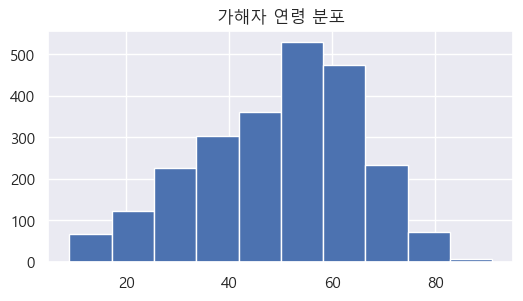

In [110]:
print('''
처리하기에 앞서 결측치 및 전처리가 필요한 사항이 있어서, 그에 대한 전처리를 수행을 하였다.

1. 결측치 처리
''')

df4_pre = df.copy()
df4_isna = df4_pre.isna().sum().to_frame().T
df4_isna.index = ['결측치']
display(df4_isna)
print(' > 총 건수 : ', df4_pre.shape[0])
print('\n성별, 연령 등이 각각 10개, 4개의 결측치가 있으나, 그 비중이 크지않기 때문에 결측치를 제거함으로써 처리를 하였다.')

df4_pre.dropna(axis=0, inplace=True)

df4_isna = df4_pre.isna().sum().to_frame().T
df4_isna.index = ['결측치']
display(df4_isna)
print(' > 총 건수 : ', df4_pre.shape[0])

print('''\n
2. 연속형으로 변환해야 할 독립변수 처리 (가해자연령)
가해자연령은 연속형 변수로 처리하고자 '세' 문자를 지우고 연속형 타입으로 변경하였다
''')

df4_pre['가해자연령'] = df4_pre['가해자연령'].apply(lambda x : int(x.replace('세', '')))

plt.figure(figsize=(6,3))
plt.hist(df4_pre['가해자연령'])
plt.title('가해자 연령 분포')
plt.show()

발생시각의 "시" 부분을 날짜형태로 치환하고, 요일을 구하여 주말여부 변수를 추가하였다. (여:주말, 부:평일)


,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,경상,여,75,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15:00:00,평일
1,중상,여,26,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13:00:00,주말
2,중상,남,34,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08:00:00,평일


,주말여부
평일,1805
주말,591


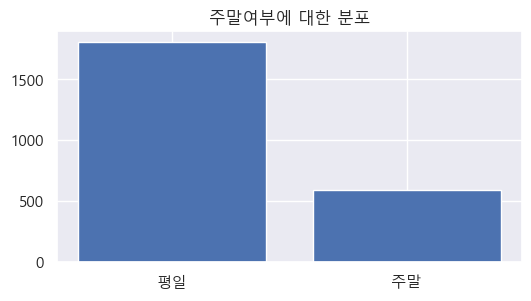

In [113]:
def isWeedend(x) :
    if x == 'Sat' :
        return '주말'
    elif x == 'Sun' :
        return '주말'
    else :
        return '평일'

df4 = df4_pre.copy()
df4['발생시각'] = pd.to_datetime(df4['발생시각'].str.replace('시', ':00:00'))
df4['주말여부'] = df4['발생시각'].dt.strftime('%a').apply(isWeedend)

print('발생시각의 "시" 부분을 날짜형태로 치환하고, 요일을 구하여 주말여부 변수를 추가하였다. (여:주말, 부:평일)')
display(df4.head(3))

display(df4['주말여부'].value_counts().to_frame())

plt.figure(figsize=(6,3))
plt.bar(x=df4['주말여부'].value_counts().index, height=df4['주말여부'].value_counts().values)
plt.title('주말여부에 대한 분포')
plt.show()

## 4-2 주말여부에 따라 각 변수들(사고내용,가해자성별,가해자연령,기상상태,사고유형)이 유의한지 통계적 검정하라.

In [114]:
print('''
첨언 : 
주말여부가 종속변수가 아니고, 사고내용(중상/경상) 이 종속변수였으며, 

뒤에 파트에서 차원축소를 처리할 때 종속변수 기준에 따라, 각 독립변수들 내에서 유의미한 차이가 있는지 
종속변수를 분류해 낼때, 종속변수 값에 따라 독립변수가 유의미한 차이를 보이는지 (잘 분류해내는 feature 인지) 를 
확인하기 위한 전단계로 해석하였습니다.

이에 따라 주어진 문제가 아닌 종속변수(사고내용)에 따라 각 독립변수들이 유의한지 통계적 검정을 수행하겠습니다.
종속변수가 범주형 변수이기 때문에 독립변수가 범주형이라면 카이제곱 검정을 수행하고,
독립변수가 연속형 변수라면 t검정을 수행하겠습니다. (만약 종속변수가 두개의 class가 아닌 3개이상의 class를 가지고있다면 분산분석을 수행해야 할 것입니다.)
''')


첨언 : 
주말여부가 종속변수가 아니고, 사고내용(중상/경상) 이 종속변수였으며, 

뒤에 파트에서 차원축소를 처리할 때 종속변수 기준에 따라, 각 독립변수들 내에서 유의미한 차이가 있는지 
종속변수를 분류해 낼때, 종속변수 값에 따라 독립변수가 유의미한 차이를 보이는지 (잘 분류해내는 feature 인지) 를 
확인하기 위한 전단계로 해석하였습니다.

이에 따라 주어진 문제가 아닌 종속변수(사고내용)에 따라 각 독립변수들이 유의한지 통계적 검정을 수행하겠습니다.
종속변수가 범주형 변수이기 때문에 독립변수가 범주형이라면 카이제곱 검정을 수행하고,
독립변수가 연속형 변수라면 t검정을 수행하겠습니다. (만약 종속변수가 두개의 class가 아닌 3개이상의 class를 가지고있다면 분산분석을 수행해야 할 것입니다.)



## (정정) 4-2 사고내용(종속변수) 에 따라 각 독립변수들(가해자성별,가해자연령,가해자차종,사고유형,기상상태,주말여부 등)이 유의한지 통계적 검정하라.

In [115]:
df4_stat = df4.copy()
print(' > 통계분석을 위해 범주형 변수들 라벨인코딩을 수행하기 전')
display(df4_stat.head())

target_col = '사고내용'
ind_col = df4_stat.drop([target_col] + ['발생시각'], axis=1).columns


from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성 - 독립변수별로 inverse 로 복구도 할 수 있게 따로 선언
# 시험당시 이렇게 인코더를 나누어서 만들생각을 못하고, dict 으로 하드코딩해서 다음 소문제에서 디코딩 수행...ㅠㅠ
사고내용_encoder = LabelEncoder()
가해자성별_encoder = LabelEncoder()
가해자차종_encoder = LabelEncoder()
피해자신체상해정도_encoder = LabelEncoder()
사고유형_encoder = LabelEncoder()
기상상태_encoder = LabelEncoder()
주말여부_encoder = LabelEncoder()

# 레이블 인코딩 적용
df4_stat['사고내용'] = 사고내용_encoder.fit_transform(df4_stat['사고내용'])
df4_stat['가해자성별'] = 가해자성별_encoder.fit_transform(df4_stat['가해자성별'])
df4_stat['가해자차종'] = 가해자차종_encoder.fit_transform(df4_stat['가해자차종'])
df4_stat['피해자신체상해정도'] = 피해자신체상해정도_encoder.fit_transform(df4_stat['피해자신체상해정도'])
df4_stat['사고유형'] = 사고유형_encoder.fit_transform(df4_stat['사고유형'])
df4_stat['기상상태'] = 기상상태_encoder.fit_transform(df4_stat['기상상태'])
df4_stat['주말여부'] = 주말여부_encoder.fit_transform(df4_stat['주말여부'])

print('\n\n > 범주형 변수 라벨인코딩 수행 후')
display(df4_stat.head())

column_list = []
pvalue_list = []

# 종속변수와 각 독립변수간 통계적 검정 수행
for col in ind_col :
    df_target = df4_stat[[target_col, col]]
    
    if col in ['가해자연령', '사망자수'] :
        # 연속형 변수 - 보수적으로 welch 근사 검정을 수행
        stat, p = stats.ttest_ind(df_target.query('사고내용 == 0')[col], df_target.query('사고내용 == 1')[col], equal_var=False)
        #print(p)
        column_list.append(col)
        pvalue_list.append(p)
    else :
        # 범주형 변수 - 카이제곱 검정
        stat, p, dof, returns = stats.chi2_contingency(pd.crosstab(df_target[target_col], df_target[col]))
        #print(p)
        column_list.append(col)
        pvalue_list.append(p)

df4_pvalue = pd.DataFrame(data=[column_list, pvalue_list]).T
df4_pvalue.columns = ['독립변수', 'pvalue']
df4_pvalue.set_index('독립변수', drop=True, inplace=True)
print('\n\n > 종속변수의 분류별 각 독립변수 통계적 검정 처리 결과(pvalue) - 발생시각은 제외(문제에서 제외됬었습니다)')
display(df4_pvalue.T)

# 결론도출
print('''
종속변수 사고내용 분류별 각 독립변수가 유의미한 차이가 있는지 카이제곱검정과, welch 근사 검정을 수행하였다.
welch 근사 검정은 연속형변수인 '가해자연령', '사망자수'에 해당한다.

각 독립변수의 유의수준은 5% 하에서 유의확률(pvalue)을 해석하였고, 
'피해자신체상해정도'와 '사고유형' 두 독립변수가 종속변수 분류간 유의미한 차이를 보여, 분류를 잘 해내는 독립변수로 판단하였다.
''')

 > 통계분석을 위해 범주형 변수들 라벨인코딩을 수행하기 전


,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,경상,여,75,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15:00:00,평일
1,중상,여,26,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13:00:00,주말
2,중상,남,34,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08:00:00,평일
3,경상,남,45,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18:00:00,주말
4,중상,남,20,자전거,중상,차대차 - 측면충돌,맑음,0,2018-06-28 16:00:00,평일




 > 범주형 변수 라벨인코딩 수행 후


,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,0,1,75,1,0,1,0,0,2018-04-03 15:00:00,1
1,1,1,26,1,1,3,0,0,2018-04-21 13:00:00,0
2,1,0,34,1,1,1,0,0,2018-05-01 08:00:00,1
3,0,0,45,1,0,1,0,0,2018-06-03 18:00:00,0
4,1,0,20,1,1,3,0,0,2018-06-28 16:00:00,1




 > 종속변수의 분류별 각 독립변수 통계적 검정 처리 결과(pvalue) - 발생시각은 제외(문제에서 제외됬었습니다)


독립변수,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,주말여부
pvalue,0.529188,0.680681,0.620806,0.0,0.014706,0.120875,0.523782,0.050694



종속변수 사고내용 분류별 각 독립변수가 유의미한 차이가 있는지 카이제곱검정과, welch 근사 검정을 수행하였다.
welch 근사 검정은 연속형변수인 '가해자연령', '사망자수'에 해당한다.

각 독립변수의 유의수준은 5% 하에서 유의확률(pvalue)을 해석하였고, 
'피해자신체상해정도'와 '사고유형' 두 독립변수가 종속변수 분류간 유의미한 차이를 보여, 분류를 잘 해내는 독립변수로 판단하였다.



In [116]:
print('''첨언 : 
이는 데이터의 차이일 것으로 생각됩니다.
연속형 변수들은 전부 유의하지 않은 pvalue 결과가 나왔고, 범주형 변수 5개정도가 유의한 결과를 보였었습니다,

진흥원에서 의도적으로 유의한 변수를 "5개" 정도 나오게끔 후처리 했을것 같습니다.

이어지는 소문제 들에서는 4-2 의 결과에서 통계적으로 유의한 변수들만 가지고 (5개 가량) 이어서 분석하도록 요구했습니다.
일단 문제에서 요구한 의도를 충족하는 방향으로 2개의 유의한 변수만 가지고 다음 소문제를 풀려고 합니다..
''')

첨언 : 
이는 데이터의 차이일 것으로 생각됩니다.
연속형 변수들은 전부 유의하지 않은 pvalue 결과가 나왔고, 범주형 변수 5개정도가 유의한 결과를 보였었습니다,

진흥원에서 의도적으로 유의한 변수를 "5개" 정도 나오게끔 후처리 했을것 같습니다.

이어지는 소문제 들에서는 4-2 의 결과에서 통계적으로 유의한 변수들만 가지고 (5개 가량) 이어서 분석하도록 요구했습니다.
일단 문제에서 요구한 의도를 충족하는 방향으로 2개의 유의한 변수만 가지고 다음 소문제를 풀려고 합니다..



## (정정) 4-3 4-2 에서 유의한 변수들만 가지고 SMOTE 오버샘플링을 수행하고 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,0,1,75,1,0,1,0,0,2018-04-03 15:00:00,1
1,1,1,26,1,1,3,0,0,2018-04-21 13:00:00,0
2,1,0,34,1,1,1,0,0,2018-05-01 08:00:00,1
3,0,0,45,1,0,1,0,0,2018-06-03 18:00:00,0
4,1,0,20,1,1,3,0,0,2018-06-28 16:00:00,1



모델링 결과에서 과대적합 여부를 확인하기 위해 홀드아웃기법을 이용하여 8:2 로 학습셋과 검증셋을 분할하였다.

변수별 빈도와 평균은 홀드아웃 처리된 학습셋을 기준으로 수행하였다.

분할전 전체 건수 :2396
학습셋 건수 : 1916 
검증셋 건수 : 480



- SMOTE 처리 전 ------------------------------------------------------------
 > 피해자신체상해정도


,피해자신체상해정도
경상,1156
중상,760


 > 사고유형


,사고유형
차대차 - 측면충돌,1076
차대차 - 기타,661
차대사람 - 기타,103
차대차 - 추돌,76


 > 사고내용


,사고내용
경상,1137
중상,779


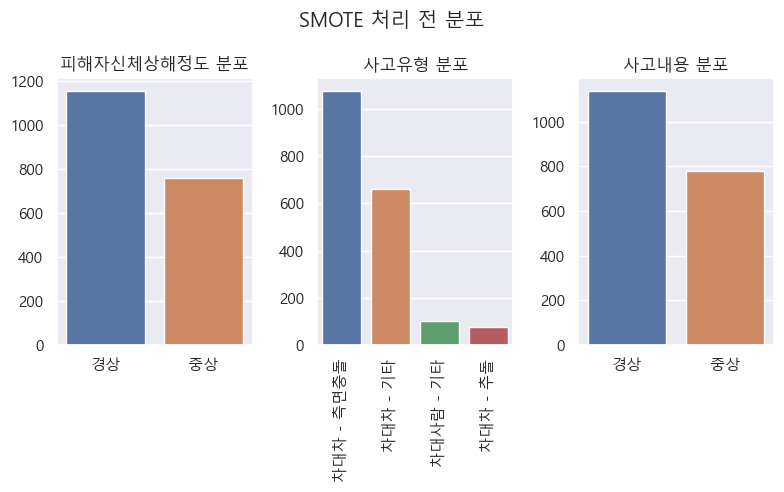



- SMOTE 처리 후 ------------------------------------------------------------
 > 피해자신체상해정도


,피해자신체상해정도
경상,1166
중상,1108


 > 사고유형


,사고유형
차대차 - 측면충돌,1287
차대차 - 기타,779
차대사람 - 기타,117
차대차 - 추돌,91


 > 사고내용


,사고내용
경상,1137
중상,1137


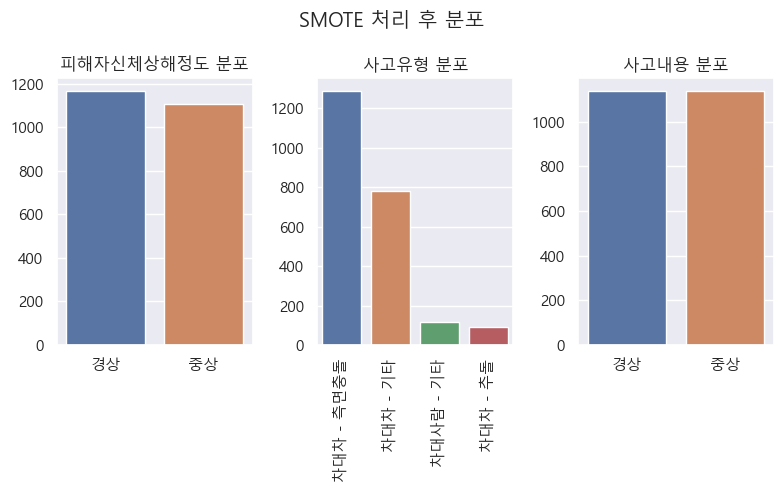


종속변수인 "사고내용" 을 기준으로 오버샘플링 된 모습을 확인해 볼 수 있다.



In [117]:
df4_over = df4_stat.copy()
display(df4_over.head())

target_col = '사고내용'
ind_col = ['피해자신체상해정도', '사고유형']

X = df4_over[ind_col]
y = df4_over[target_col]


# 과적합 확인을 위해 학습-검증 셋을 분리하여 구성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42) # 

print('''
모델링 결과에서 과대적합 여부를 확인하기 위해 홀드아웃기법을 이용하여 8:2 로 학습셋과 검증셋을 분할하였다.

변수별 빈도와 평균은 홀드아웃 처리된 학습셋을 기준으로 수행하였다.

분할전 전체 건수 :{}
학습셋 건수 : {} 
검증셋 건수 : {}
''' .format(len(X), len(X_train), len(X_test)))

print('\n\n- SMOTE 처리 전 ------------------------------------------------------------')
# 정수형 레이블을 다시 문자열 레이블로 변환
피해자신체상해정도_decoded = 피해자신체상해정도_encoder.inverse_transform(X_train['피해자신체상해정도'])
사고유형_decoded = 사고유형_encoder.inverse_transform(X_train['사고유형'])
사고내용_decoded = 사고내용_encoder.inverse_transform(y_train)

# 레이블 복구 변환하여 빈도표 출력
print(' > 피해자신체상해정도')
vc_피해자신체상해정도 = pd.Series(피해자신체상해정도_decoded).value_counts()
df_피해자신체상해정도 = vc_피해자신체상해정도.to_frame()
df_피해자신체상해정도.columns = ['피해자신체상해정도']
display(df_피해자신체상해정도)

print(' > 사고유형')
vc_사고유형 = pd.Series(사고유형_decoded).value_counts()
df_사고유형 = vc_사고유형.to_frame()
df_사고유형.columns = ['사고유형']
display(df_사고유형)

print(' > 사고내용')
vc_사고내용 = pd.Series(사고내용_decoded).value_counts()
df_사고내용 = vc_사고내용.to_frame()
df_사고내용.columns = ['사고내용']
display(df_사고내용)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(8, 5))

sns.barplot(x = vc_피해자신체상해정도.index, y = vc_피해자신체상해정도.values, ax=axes[0])
axes[0].set_title('피해자신체상해정도 분포')

sns.barplot(x = vc_사고유형.index, y = vc_사고유형.values, ax=axes[1])
axes[1].set_title('사고유형 분포')
# x 축 레이블을 45도로 회전
axes[1].set_xticklabels(vc_사고유형.index, rotation=90)

sns.barplot(x = vc_사고내용.index, y = vc_사고내용.values, ax=axes[2])
axes[2].set_title('사고내용 분포')


plt.suptitle('SMOTE 처리 전 분포')
fig.tight_layout()
plt.show()

print('\n\n- SMOTE 처리 후 ------------------------------------------------------------')
from imblearn.over_sampling import SMOTE

# SMOTE를 이용한 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=42)  # sampling_strategy를 조절하여 오버샘플링 비율을 조절할 수 있습니다.
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# 정수형 레이블을 다시 문자열 레이블로 변환
사고내용_decoded = 사고내용_encoder.inverse_transform(y_sm)
피해자신체상해정도_decoded = 피해자신체상해정도_encoder.inverse_transform(X_sm['피해자신체상해정도'])
사고유형_decoded = 사고유형_encoder.inverse_transform(X_sm['사고유형'])


# 레이블 복구 변환하여 빈도표 출력
print(' > 피해자신체상해정도')
vc_피해자신체상해정도 = pd.Series(피해자신체상해정도_decoded).value_counts()
df_피해자신체상해정도 = vc_피해자신체상해정도.to_frame()
df_피해자신체상해정도.columns = ['피해자신체상해정도']
display(df_피해자신체상해정도)

print(' > 사고유형')
vc_사고유형 = pd.Series(사고유형_decoded).value_counts()
df_사고유형 = vc_사고유형.to_frame()
df_사고유형.columns = ['사고유형']
display(df_사고유형)

print(' > 사고내용')
vc_사고내용 = pd.Series(사고내용_decoded).value_counts()
df_사고내용 = vc_사고내용.to_frame()
df_사고내용.columns = ['사고내용']
display(df_사고내용)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(8, 5))

sns.barplot(x = vc_피해자신체상해정도.index, y = vc_피해자신체상해정도.values, ax=axes[0])
axes[0].set_title('피해자신체상해정도 분포')

sns.barplot(x = vc_사고유형.index, y = vc_사고유형.values, ax=axes[1])
axes[1].set_title('사고유형 분포')
# x 축 레이블을 45도로 회전
axes[1].set_xticklabels(vc_사고유형.index, rotation=90)

sns.barplot(x = vc_사고내용.index, y = vc_사고내용.values, ax=axes[2])
axes[2].set_title('사고내용 분포')


plt.suptitle('SMOTE 처리 후 분포')
fig.tight_layout()
plt.show()


print('''
종속변수인 "사고내용" 을 기준으로 오버샘플링 된 모습을 확인해 볼 수 있다.
''')

## (정정) 종속변수는 사고내용이었습니다.
## (정정) 4-4 로지스틱회귀분석, XGB 분류모델을 이용하여 모델링하고, 영향도 있는 변수를 확인하기 (난수 1234, 단 기준변 변수 설정하기 eg) 차대사람, 날씨는 맑음 등)
 - 추가 적으로 둘중 어떤 모델이 더 분류를 잘하는지, 그리고 영향도있는 변수가 무엇인지 요구했던것같은데 기억이 희미하네요

 train set ------------------------
XGB
accuracy_score :  0.9872471416007036
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1137
           1       1.00      0.97      0.99      1137

    accuracy                           0.99      2274
   macro avg       0.99      0.99      0.99      2274
weighted avg       0.99      0.99      0.99      2274


로지스틱회귀분석
accuracy_score :  0.9872471416007036
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1137
           1       1.00      0.97      0.99      1137

    accuracy                           0.99      2274
   macro avg       0.99      0.99      0.99      2274
weighted avg       0.99      0.99      0.99      2274



 test set ------------------------
XGB
accuracy_score :  0.9958333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       285
           1       1.00      0.99  

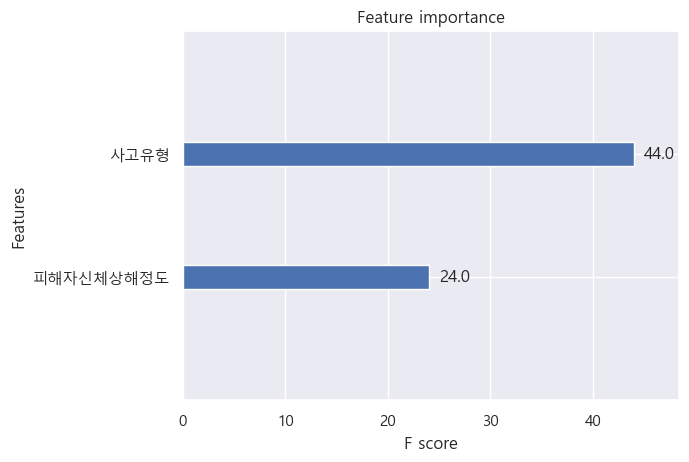


사고유형, 피해자신체상해정도 순으로 XGB분류모델이 사고내용을 분류하는데 높은 중요도를 차지하였다.



In [118]:
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

xgb = XGBClassifier(random_state=1234)
lgs = LogisticRegression(random_state=1234)

xgb.fit(X_sm, y_sm)
lgs.fit(X_sm, y_sm)

xgb_train_pred = xgb.predict(X_sm)
xgb_test_pred  = xgb.predict(X_test)

lgs_train_pred = lgs.predict(X_sm)
lgs_test_pred  = lgs.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print(' train set ------------------------')
print('XGB')
print('accuracy_score : ', accuracy_score(y_sm, xgb_train_pred))
print(classification_report(y_sm, xgb_train_pred))
print('\n로지스틱회귀분석')
print('accuracy_score : ', accuracy_score(y_sm, lgs_train_pred))
print(classification_report(y_sm, lgs_train_pred))


print('\n\n test set ------------------------')
print('XGB')
print('accuracy_score : ', accuracy_score(y_test, xgb_test_pred))
print(classification_report(y_test, xgb_test_pred))
print('\n로지스틱회귀분석')
print('accuracy_score : ', accuracy_score(y_test, lgs_test_pred))
print(classification_report(y_test, lgs_test_pred))

print('''
공교롭게도 유의한 독립변수의 갯수가 단 2개 뿐이어서 모델의 독립변수로 2개만 사용하였고, 로지스틱회귀분석 모델과 XGB 분류모델의 성능차이가 거의 없다.

실제 시험에서는 XGB 가 성능이 조금 더 좋은 결과를 얻어서 XGB 분류모델을 선택하고 해당 모델의 변수중요도를 출력하였다.
''')


# 변수 중요도 시각화
xgboost.plot_importance(xgb)
plt.show()

print('''
사고유형, 피해자신체상해정도 순으로 XGB분류모델이 사고내용을 분류하는데 높은 중요도를 차지하였다.
''')


첨언 : 
유의하지 않은 다른변수를 모두 넣었을때 두 모델간의 성능차이를 확인 할 수 있다.
(일부러 모두 넣고 산출 해본것임을 참고)

독립변수의 차원이 너무 작지 않은 경우, 그안에서 변수간 영향으로 인해 어느정도의 성능차이를 발견할 수 있다.


XGB 는 트리기반의 부스터모델로 학습셋에 과대적합되는 경향이 있기때문에, 
사전 가지치기 기법을 이용하여 과대적합 되지 않도록 하이퍼파라미터를 조정할 수 있다.

조정없이 학습셋과 검증셋이 어느정도 비슷한 수준을 유지하고 있기때문에 학습셋에 과도하게 적합되있다고 할 수 없으므로 적정 수준으로 모델링 되었다고 볼 수 있겠다.

XGB 분류모델을 선택하고, 해당 모델에서 중상과 경상을 분류해내는데 유효했던 주요 변수가 어떤 변수인지 확인 하였다.



,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,0,1,75,1,0,1,0,0,2018-04-03 15:00:00,1
1,1,1,26,1,1,3,0,0,2018-04-21 13:00:00,0
2,1,0,34,1,1,1,0,0,2018-05-01 08:00:00,1
3,0,0,45,1,0,1,0,0,2018-06-03 18:00:00,0
4,1,0,20,1,1,3,0,0,2018-06-28 16:00:00,1


 train set ------------------------
XGB
accuracy_score :  0.9929639401934917
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.99      0.99      1137

    accuracy                           0.99      2274
   macro avg       0.99      0.99      0.99      2274
weighted avg       0.99      0.99      0.99      2274


로지스틱회귀분석
accuracy_score :  0.98636763412489
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1137
           1       1.00      0.97      0.99      1137

    accuracy                           0.99      2274
   macro avg       0.99      0.99      0.99      2274
weighted avg       0.99      0.99      0.99      2274



 test set ------------------------
XGB
accuracy_score :  0.9895833333333334
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       285
           1       0.99      0.98    

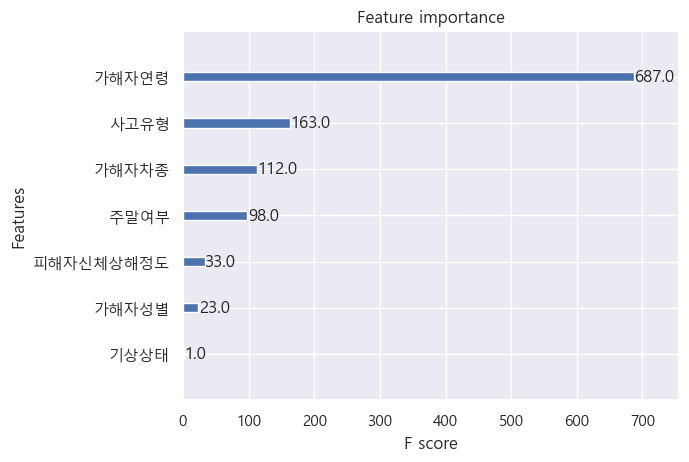

XGB 는 변수중요도를 api를 통해서 출력할 수 있다.


,계수,절대값
변수,,
피해자신체상해정도,8.430917,8.430917
가해자성별,-0.553685,0.553685
주말여부,-0.433121,0.433121
기상상태,-0.397731,0.397731
가해자차종,0.286051,0.286051
사망자수,0.141809,0.141809
사고유형,0.028967,0.028967
가해자연령,0.011806,0.011806



로지스틱회귀모델은 계수를 변수중요도 판단기준으로 지정하였다. 
계수의 절대값이 클수록 모델링 결과에 미치는 영향이 클것이라 생각했기 때문이다.
따라서, 계수의 절대값이 큰 순서대로 해당 독립변수가 중요도가 크다고 판단하였다.



In [119]:
print('''
첨언 : 
유의하지 않은 다른변수를 모두 넣었을때 두 모델간의 성능차이를 확인 할 수 있다.
(일부러 모두 넣고 산출 해본것임을 참고)

독립변수의 차원이 너무 작지 않은 경우, 그안에서 변수간 영향으로 인해 어느정도의 성능차이를 발견할 수 있다.


XGB 는 트리기반의 부스터모델로 학습셋에 과대적합되는 경향이 있기때문에, 
사전 가지치기 기법을 이용하여 과대적합 되지 않도록 하이퍼파라미터를 조정할 수 있다.

조정없이 학습셋과 검증셋이 어느정도 비슷한 수준을 유지하고 있기때문에 학습셋에 과도하게 적합되있다고 할 수 없으므로 적정 수준으로 모델링 되었다고 볼 수 있겠다.

XGB 분류모델을 선택하고, 해당 모델에서 중상과 경상을 분류해내는데 유효했던 주요 변수가 어떤 변수인지 확인 하였다.
''')

df4_over = df4_stat.copy()
display(df4_over.head())

target_col = '사고내용'
drop_col = ['발생시각']

Xt = df4_over.drop(drop_col+[target_col], axis=1)
yt = df4_over[target_col]


# 과적합 확인을 위해 학습-검증 셋을 분리하여 구성
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(Xt, yt, stratify=yt, test_size=0.2) # 


# SMOTE를 이용한 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=42)  # sampling_strategy를 조절하여 오버샘플링 비율을 조절할 수 있습니다.
X_smt, y_smt = smote.fit_resample(X_t, y_t)


xgb = XGBClassifier(random_state=1234)
lgs = LogisticRegression(random_state=1234)

xgb.fit(X_smt, y_smt)
lgs.fit(X_smt, y_smt)

xgb_smt_pred = xgb.predict(X_smt)
xgb_v_pred  = xgb.predict(X_v)

lgs_smt_pred = lgs.predict(X_smt)
lgs_v_pred  = lgs.predict(X_v)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print(' train set ------------------------')
print('XGB')
print('accuracy_score : ', accuracy_score(y_smt, xgb_smt_pred))
print(classification_report(y_smt, xgb_smt_pred))
print('\n로지스틱회귀분석')
print('accuracy_score : ', accuracy_score(y_smt, lgs_smt_pred))
print(classification_report(y_smt, lgs_smt_pred))


print('\n\n test set ------------------------')
print('XGB')
print('accuracy_score : ', accuracy_score(y_v, xgb_v_pred))
print(classification_report(y_v, xgb_v_pred))
print('\n로지스틱회귀분석')
print('accuracy_score : ', accuracy_score(y_v, lgs_v_pred))
print(classification_report(y_v, lgs_v_pred))



# 변수 중요도 시각화
xgboost.plot_importance(xgb)
plt.show()

print('XGB 는 변수중요도를 api를 통해서 출력할 수 있다.')

# 변수 중요도 확인
coefficients = lgs.coef_

df4_importances = pd.DataFrame(data=[Xt.columns, coefficients[0]]).T
df4_importances.columns = ['변수', '계수']
df4_importances.set_index('변수', drop=True, inplace=True)
df4_importances['절대값'] = np.abs(df4_importances['계수'])
display(df4_importances.sort_values(by=['절대값'], ascending=False))

print('''
로지스틱회귀모델은 계수를 변수중요도 판단기준으로 지정하였다. 
계수의 절대값이 클수록 모델링 결과에 미치는 영향이 클것이라 생각했기 때문이다.
따라서, 계수의 절대값이 큰 순서대로 해당 독립변수가 중요도가 크다고 판단하였다.
''')

# 통계 (40점)

## 5. 
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

In [120]:
#!pip install pulp

In [121]:
import pulp

# 1.변수를 정의
a1 = pulp.LpVariable(name='a1', lowBound=0) # a공장 - 지역1
a2 = pulp.LpVariable(name='a2', lowBound=0) # a공장 - 지역2
a3 = pulp.LpVariable(name='a3', lowBound=0) # a공장 - 지역3
b1 = pulp.LpVariable(name='b1', lowBound=0) # b공장 - 지역1
b2 = pulp.LpVariable(name='b2', lowBound=0) # b공장 - 지역2
b3 = pulp.LpVariable(name='b3', lowBound=0) # b공장 - 지역3
c1 = pulp.LpVariable(name='c1', lowBound=0) # c공장 - 지역1
c2 = pulp.LpVariable(name='c2', lowBound=0) # c공장 - 지역2
c3 = pulp.LpVariable(name='c3', lowBound=0) # c공장 - 지역3

# 2. 문제정의
model = pulp.LpProblem(name='model', sense=pulp.LpMinimize) # 최소값 최적해탐색

# 3. 목적함수 정의
model.objective = (20 * a1) + (5 * a2) + (35 * a3) \
                + (15 * b1) + (2 * b2) + (20 * b3) \
                + (3 * c1) + (14 * c2) + (17 * c3)  

#print(model.objective)

# 4. 제약조건 정의
constraints = [a1 + b1 + c1 == 80, # 지역1수요
               a2 + b2 + c2 == 50, # 지역2수요
               a3 + b3 + c3 == 60, # 지역3수요
               a1 + a2 + a3 <= 75, # 공장a공급
               b1 + b2 + b3 <= 55, # 공장b공급
               c1 + c2 + c3 <= 60] # 공장c공급

# 5. 목적함수에 제약조건 설정
for i, c in enumerate(constraints) :
    constraint_name = f"const_{i}"
    model.constraints[constraint_name] = c
#print(model.constraints)

# 6. 문제해결
model.solve()

# 7. 결과값 확인
print('''선형계획법으로 최소운송비용을 찾은 결과 각 변수의 결과는 다음과 같다.''')
for v in model.variables() :
    #print(v)
    #print(v.varValue)
    print(v, ' : ', v.varValue)

print('''
수식 : {}

최소비용으로 찾은 최적해결과를 문제 수식에 대입하여 결과를 도출한다.
최소배송비용 : {}
''' 
.format(model.objective, 20*25 + 5*50 + 35*0 + 15*0 + 2*0 + 20*55 + 3*55 + 14*0 + 17*5))

선형계획법으로 최소운송비용을 찾은 결과 각 변수의 결과는 다음과 같다.
a1  :  25.0
a2  :  50.0
a3  :  0.0
b1  :  0.0
b2  :  0.0
b3  :  55.0
c1  :  55.0
c2  :  0.0
c3  :  5.0

수식 : 20*a1 + 5*a2 + 35*a3 + 15*b1 + 2*b2 + 20*b3 + 3*c1 + 14*c2 + 17*c3

최소비용으로 찾은 최적해결과를 문제 수식에 대입하여 결과를 도출한다.
최소배송비용 : 2100



## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3) 설문조사

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')
df.head()

,나이,선호도
0,청년,2
1,장년,2
2,청년,2
3,청년,1
4,장년,1


## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

In [123]:
print('''가설설정
- 귀무가설(H0) : 연령별 헤드셋 브랜드 선호도에 차이는 없다.
- 연구가설(H1) : 연령별 헤드셋 브랜드 선호도에는 차이가 있다.
''')

가설설정
- 귀무가설(H0) : 연령별 헤드셋 브랜드 선호도에 차이는 없다.
- 연구가설(H1) : 연령별 헤드셋 브랜드 선호도에는 차이가 있다.



## 6.2 유의수준 하에서 통계 검정해라

In [124]:
print('''
카이제곱통계량을 이용하여 독립성 검정을 수행한다.
''')
df6 = df.copy()
df6_cross = pd.crosstab(df6['나이'], df6['선호도'])
display(df6_cross)

stat, p, ddof, expects = stats.chi2_contingency(df6_cross)
stat, p, ddof, expects

alpha = 0.05
print('''
카이제곱통계량은 {} 이고, 유의확률값은 {} 이다.
''' .format(round(stat,3), round(p, 3)))

if p < 0.05 :
    print('''
5% 유의수준하에서 유의확률값이 0.05 보다 작으므로, 귀무가설을 기각한다.
연령별 헤드셋 브랜드 선호도에는 유의미한 차이가 있다.
    ''')
else :
    print('''
5% 유의수준 하에서 유의확률값이 0.05 보다 크므로, 귀무가설을 기각 할 수 없다.
연령별 헤드셋 브랜드 선호도간에 유의미한 차이가 있다고 할 수 없다.
    ''')


카이제곱통계량을 이용하여 독립성 검정을 수행한다.



선호도,1,2,3
나이,,,
노년,35,32,25
장년,25,23,17
청년,47,44,29



카이제곱통계량은 0.265 이고, 유의확률값은 0.992 이다.


5% 유의수준 하에서 유의확률값이 0.05 보다 크므로, 귀무가설을 기각 할 수 없다.
연령별 헤드셋 브랜드 선호도간에 유의미한 차이가 있다고 할 수 없다.
    


## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라.

In [125]:
print('''첨언 : 
해당 문제의 배점은 5점으로 기억합니다.

이항분포의 확률질량함수를 이용하여 자녀6명 중 딸이 4명이상일 확률을 구하고,
그 확률을 가지고, 다시 확률질량함수를 이용하여 3가족이 딸 4명이상일 확률 + 4가족 확률 + 5가족 확률 을 합산하였습니다.

값을 표시할때 반올림해서 몇째 자리까지 표시하라고 자세히 제시하였습니다. 편의상 3자리까지 표시하겠습니다.
''')

첨언 : 
해당 문제의 배점은 5점으로 기억합니다.

이항분포의 확률질량함수를 이용하여 자녀6명 중 딸이 4명이상일 확률을 구하고,
그 확률을 가지고, 다시 확률질량함수를 이용하여 3가족이 딸 4명이상일 확률 + 4가족 확률 + 5가족 확률 을 합산하였습니다.

값을 표시할때 반올림해서 몇째 자리까지 표시하라고 자세히 제시하였습니다. 편의상 3자리까지 표시하겠습니다.



In [126]:
f4_p = stats.binom.pmf(k=4, n=6, p=0.5) # 한가족이 6자녀중 딸이 4명일 확률
f5_p = stats.binom.pmf(k=5, n=6, p=0.5) # 한가족이 6자녀중 딸이 5명일 확률
f6_p = stats.binom.pmf(k=6, n=6, p=0.5) # 한가족이 6자녀중 딸이 6명일 확률
f_p = f4_p + f5_p + f6_p
print('6자녀중 딸이 4명이상일 확률 :', round(f_p,3))

fam_n = 5
fam3 = stats.binom.pmf(k=3, n=fam_n, p=f_p) # 딸4명이상인 가족이 5가족 중 3가족
fam4 = stats.binom.pmf(k=4, n=fam_n, p=f_p) # 딸4명이상인 가족이 5가족 중 4가족
fam5 = stats.binom.pmf(k=5, n=fam_n, p=f_p) # 딸4명이상인 가족이 5가족 중 5가족

print('5가족 중 3가족이 딸 4명이상일 확률 :', round(fam3,3))
print('5가족 중 4가족이 딸 4명이상일 확률 :', round(fam4,3))
print('5가족 중 5가족이 딸 4명이상일 확률 :', round(fam5,3))

print('딸이 4명이상인 가족이 3가족 이상일 확률 :', round(fam3+fam4+fam5, 3))

6자녀중 딸이 4명이상일 확률 : 0.344
5가족 중 3가족이 딸 4명이상일 확률 : 0.175
5가족 중 4가족이 딸 4명이상일 확률 : 0.046
5가족 중 5가족이 딸 4명이상일 확률 : 0.005
딸이 4명이상인 가족이 3가족 이상일 확률 : 0.226


## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? 

In [127]:
print('''첨언 :
해당 문제의 배점은 10점으로 기억합니다.

기댓값의 개념이 부족해서 실제 풀이 시 5가족중 한가족이 딸 4명이상일 확률에 n을 곱해서 제출하여 감점되었다고 생각됩니다.
제출 : round(stats.binom.pmf(k=1, n=fam_n, p=f_p) * 5, 3)

가구 내 6자녀중 딸 4명 이상일 확률을 구하고 곱하기 n(n=5) 로 풀면 올바른 해답이 아닐까 예상해봅니다.
eg) f_p * n = {} * {}
''' .format(f_p, 5))

첨언 :
해당 문제의 배점은 10점으로 기억합니다.

기댓값의 개념이 부족해서 실제 풀이 시 5가족중 한가족이 딸 4명이상일 확률에 n을 곱해서 제출하여 감점되었다고 생각됩니다.
제출 : round(stats.binom.pmf(k=1, n=fam_n, p=f_p) * 5, 3)

가구 내 6자녀중 딸 4명 이상일 확률을 구하고 곱하기 n(n=5) 로 풀면 올바른 해답이 아닐까 예상해봅니다.
eg) f_p * n = 0.34375 * 5



In [128]:
expected_fam = fam_n * f_p

print('5가족 중 4명이상의 딸을 가지는 가족의 수에 대한 기댓값 :', round(expected_fam, 3))

5가족 중 4명이상의 딸을 가지는 가족의 수에 대한 기댓값 : 1.719


In [129]:
print('실제 시험에서 제출한 답안 : ')
round(stats.binom.pmf(k=1, n=fam_n, p=f_p) * 5, 3) # 실제 제출값

실제 시험에서 제출한 답안 : 


1.594

created by datamanim [web-link](https://www.datamanim.com)